In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..\..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [17]:
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

from src.spread import v_margrabe, margrabe_gammas, margrabe_cross_gamma, margrabe_deltas
import scienceplots
plt.style.use(['science','no-latex'])

In [3]:
spots_1_range = jnp.arange(80, 200, 10, dtype=jnp.float32)
spots_2_range = jnp.arange(80, 200, 10, dtype=jnp.float32)
spots_1, spots_2 = jnp.meshgrid(spots_1_range, spots_2_range)

In [4]:
sigma_1 = jnp.full_like(spots_1, 0.2, dtype=jnp.float32)
sigma_2 = jnp.full_like(spots_1, 0.3, dtype=jnp.float32)
corr = jnp.full_like(spots_1, 0.5, dtype=jnp.float32)
expires = jnp.full_like(spots_1, 1.0, dtype=jnp.float32)

In [5]:
prices = v_margrabe(spots_1, spots_2, 1.0, 0.2, 0.3, 0.5)

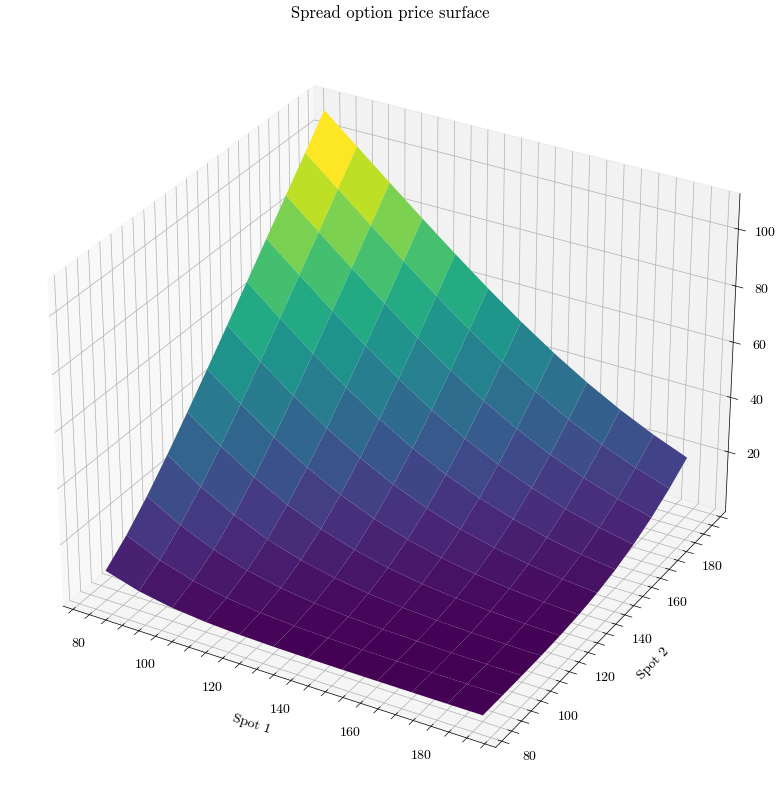

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(spots_1, spots_2, prices, cmap='viridis')
ax.set_title('Spread option price surface')
ax.set_xlabel('Spot 1')
ax.set_ylabel('Spot 2')
ax.set_zlabel('Price')
plt.show()

## Spread Greeks at time $T = 1.0$

### $\Delta_1$ and $\Delta_2$

In [18]:
deltas = jnp.asarray([[margrabe_deltas(spots_1[i, j], spots_2[i, j], expires[i, j], sigma_1[i, j], sigma_2[i, j], corr[i, j]) for i in range(spots_1.shape[0])] for j in range(spots_1.shape[1])])

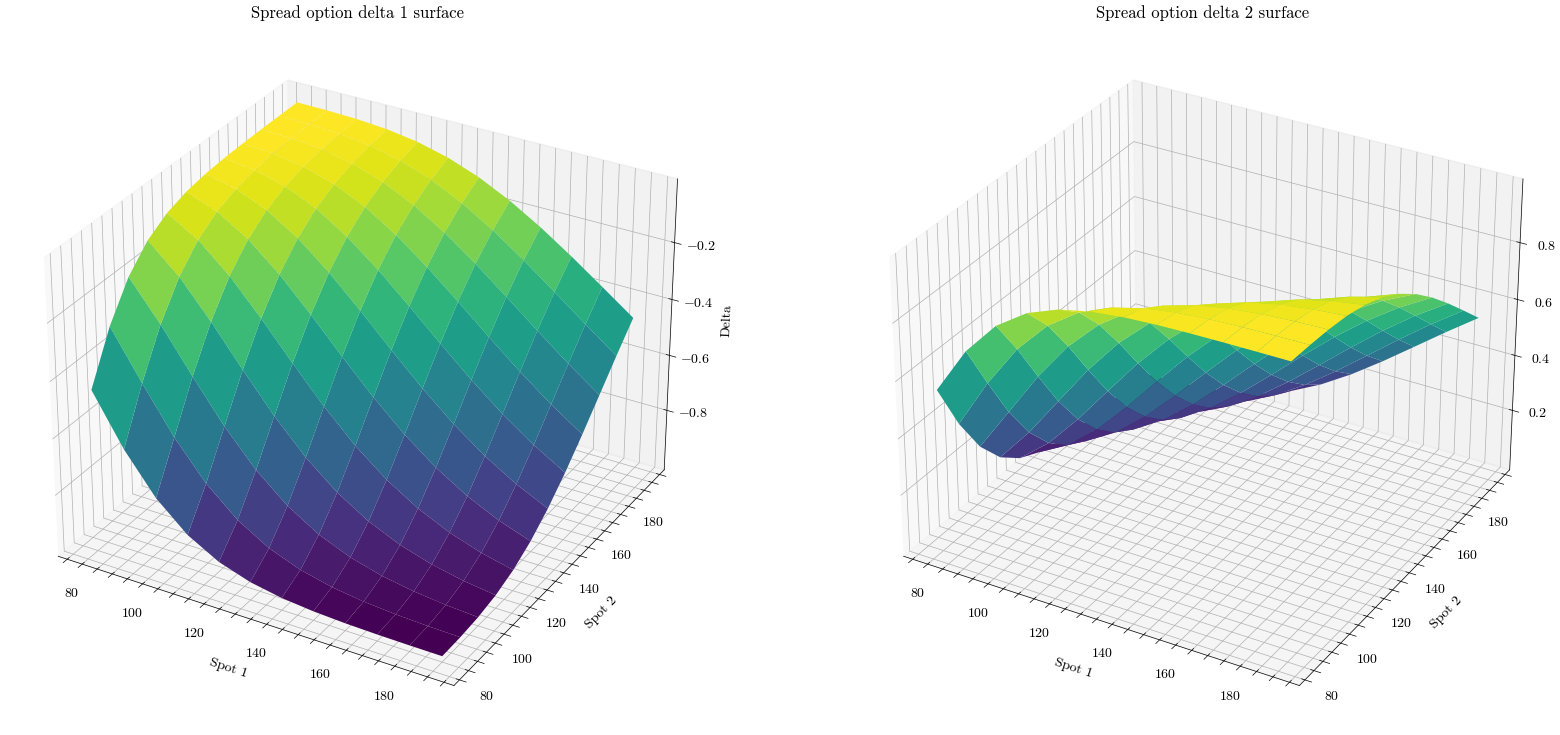

In [19]:
# Plot the delta surfaces
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121, projection='3d')

ax.plot_surface(spots_1, spots_2, deltas[:, :, 0], cmap='viridis')
ax.set_title('Spread option delta 1 surface')
ax.set_xlabel('Spot 1')
ax.set_ylabel('Spot 2')
ax.set_zlabel('Delta')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(spots_1, spots_2, deltas[:, :, 1], cmap='viridis')
ax.set_title('Spread option delta 2 surface')
ax.set_xlabel('Spot 1')
ax.set_ylabel('Spot 2')
ax.set_zlabel('Delta')
plt.show()

### $\Gamma_{11}$ and $\Gamma_{22}$

In [7]:
gammas = jnp.asarray([[margrabe_gammas(spots_1[i, j], spots_2[i, j], expires[i, j], sigma_1[i, j], sigma_2[i, j], corr[i, j]) for i in range(spots_1.shape[0])] for j in range(spots_1.shape[1])])

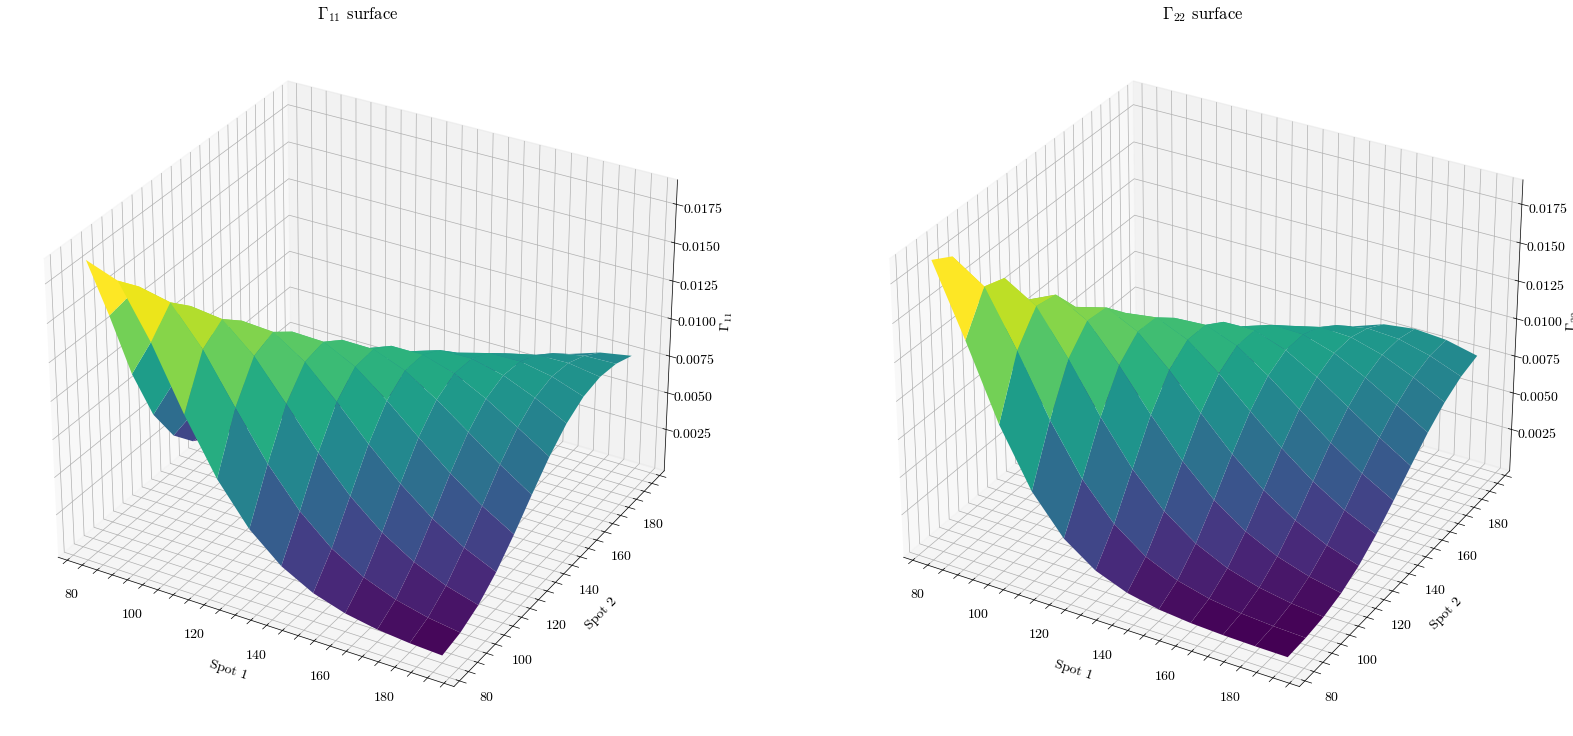

In [8]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

ax1.plot_surface(spots_1, spots_2, gammas[:, :, 0], cmap='viridis')
ax1.set_title(r'$\Gamma_{11}$ surface')
ax1.set_xlabel('Spot 1')
ax1.set_ylabel('Spot 2')
ax1.set_zlabel(r'$\Gamma_{11}$')

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot_surface(spots_1, spots_2, gammas[:, :, 1], cmap='viridis')
ax.set_title(r'$\Gamma_{22}$ surface')
ax.set_xlabel('Spot 1')
ax.set_ylabel('Spot 2')
ax.set_zlabel(r'$\Gamma_{22}$')


plt.show()

### $\Gamma_{12}$

In [9]:
cross_gammas = jnp.asarray([[margrabe_cross_gamma(spots_1[i, j], spots_2[i, j], expires[i, j], sigma_1[i, j], sigma_2[i, j], corr[i, j]) for i in range(spots_1.shape[0])] for j in range(spots_1.shape[1])])

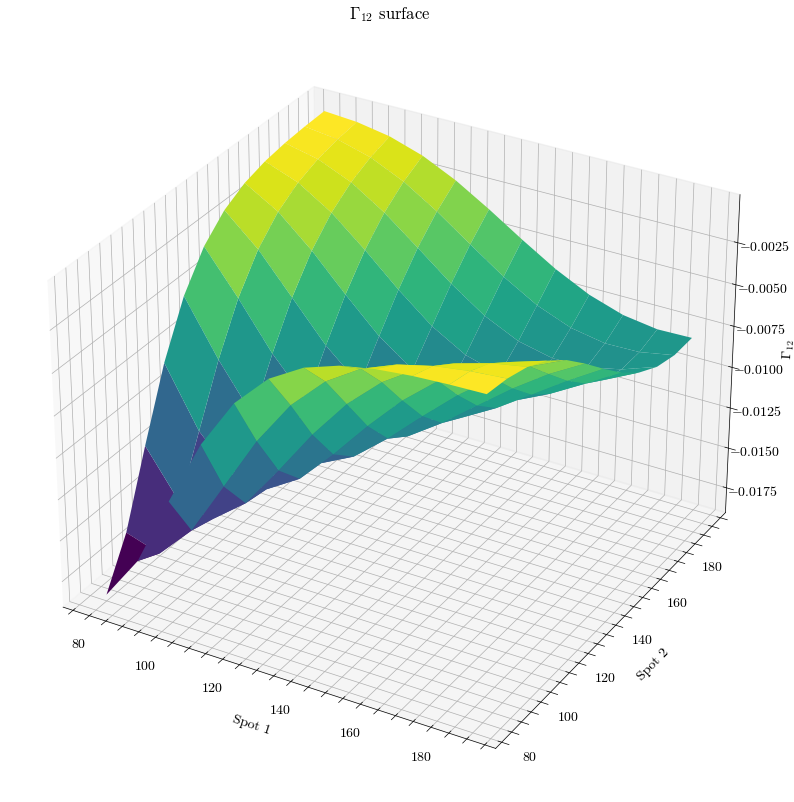

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(spots_1, spots_2, cross_gammas[:, :, 0], cmap='viridis')
ax.set_title(r'$\Gamma_{12}$ surface')
ax.set_xlabel('Spot 1')
ax.set_ylabel('Spot 2')
ax.set_zlabel(r'$\Gamma_{12}$')

plt.show()